
# Unsupervised Learning (Clustering)


## Background: 

AllLife Bank wants to focus on its credit card customer base in the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Another insight from the market research
was that the customers perceive the support services of the bank poorly. 
Objective: To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank.

## About the data:

The data has customers as a data points with the following features-
- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit(currency less)
- Total_Credit_Cards	- Total number of credit cards 
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.cluster import KMeans
import sklearn

In [2]:
import warnings
warnings.filterwarnings('ignore') 
pd.options.display.float_format = '{:,.2f}'.format        
sns.set_style(style='darkgrid')

In [3]:
df = pd.read_excel("Credit Card Customer Data.xlsx")

In [4]:
df.shape

(660, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [6]:
# check for the duplicate 
df.duplicated().sum()

0

In [7]:
# check for missing values
df.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [8]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [9]:
# No missing values. Now figure out the uniques in each column. 
df.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [10]:
# There are some duplicates in customer key
duplicate_keys = df['Customer Key'].duplicated()
df[duplicate_keys]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [11]:
# drop duplicate customer keys
df = df[~duplicate_keys]
#df = df.drop_duplicates(subset='Customer Key', keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                655 non-null    int64
 1   Customer Key         655 non-null    int64
 2   Avg_Credit_Limit     655 non-null    int64
 3   Total_Credit_Cards   655 non-null    int64
 4   Total_visits_bank    655 non-null    int64
 5   Total_visits_online  655 non-null    int64
 6   Total_calls_made     655 non-null    int64
dtypes: int64(7)
memory usage: 40.9 KB


In [12]:
# drop Sl_No and Customer Key as they are no longer needed
df.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)

In [13]:
df.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4


In [14]:
# check for duplicates now, which are customers with identical features
df[df.duplicated()]


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


In [15]:
# drop duplicates
df=df[~df.duplicated()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 644 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     644 non-null    int64
 1   Total_Credit_Cards   644 non-null    int64
 2   Total_visits_bank    644 non-null    int64
 3   Total_visits_online  644 non-null    int64
 4   Total_calls_made     644 non-null    int64
dtypes: int64(5)
memory usage: 30.2 KB


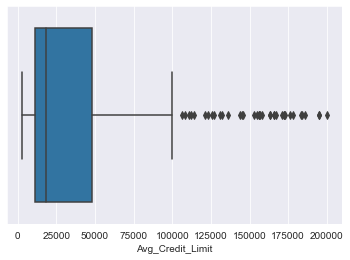

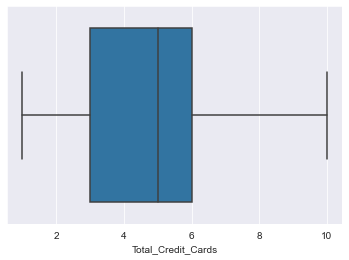

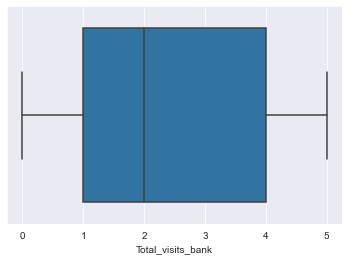

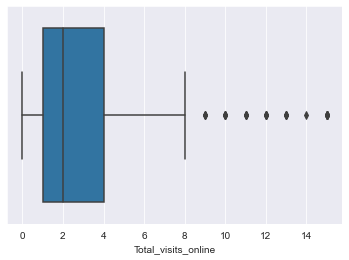

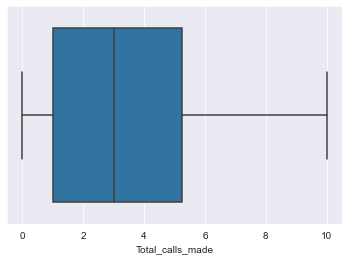

In [16]:
# exploring each variable at hand using boxplot
features = list(df.columns)

def boxplots_plot(features, df):
    for i in features:
        sns.boxplot(df[i])
        plt.show()
  
boxplots_plot(features,df)



<AxesSubplot:>

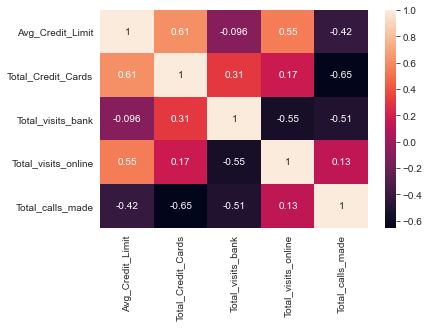

In [17]:
# there are some outliers in the Average credit limit and total visits online features
# generate a correlation heatmap to see feature correlations
sns.heatmap(df.corr(), annot= True)


In [18]:
# scale the dataset
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_scaled = pd.DataFrame(mms.fit_transform(df))
df_scaled.columns = features

df_scaled.head(3)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.49,0.11,0.20,0.07,0.00
1,0.24,0.22,0.00,0.67,0.90
2,0.24,0.67,0.20,0.20,0.40


In [19]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,644.00,0.16,0.19,0.00,0.04,0.08,0.23,1.00
Total_Credit_Cards,644.00,0.41,0.24,0.00,0.22,0.44,0.56,1.00
Total_visits_bank,644.00,0.48,0.33,0.00,0.20,0.40,0.80,1.00
Total_visits_online,644.00,0.17,0.20,0.00,0.07,0.13,0.27,1.00
Total_calls_made,644.00,0.36,0.29,0.00,0.10,0.30,0.53,1.00


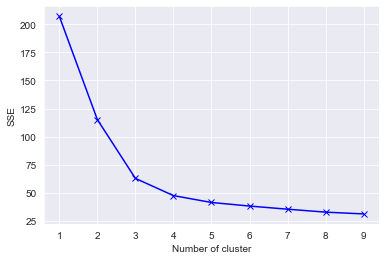

In [20]:
# fit kmeans algorithm to find out the optimum number of clusters to use.
sse = {} 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=12).fit(df_scaled)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [21]:
# Looking at the plot, elbow point is at k=3 or 4
# Fit the kmeans again with k=3 to get the labels
kmeans = KMeans(n_clusters=3, max_iter= 1000, random_state=12)
kmeans.fit(df_scaled)
df_scaled['Labels'] = kmeans.predict(df_scaled) 
df_scaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels
0,0.49,0.11,0.20,0.07,0.00,1
1,0.24,0.22,0.00,0.67,0.90,0
2,0.24,0.67,0.20,0.20,0.40,1
3,0.14,0.44,0.20,0.07,0.40,0
4,0.49,0.56,0.00,0.80,0.30,2
...,...,...,...,...,...,...
639,0.49,1.00,0.20,0.67,0.00,2
640,0.41,1.00,0.20,0.87,0.20,2
641,0.72,0.78,0.20,0.60,0.10,2
642,0.86,1.00,0.20,1.00,0.00,2


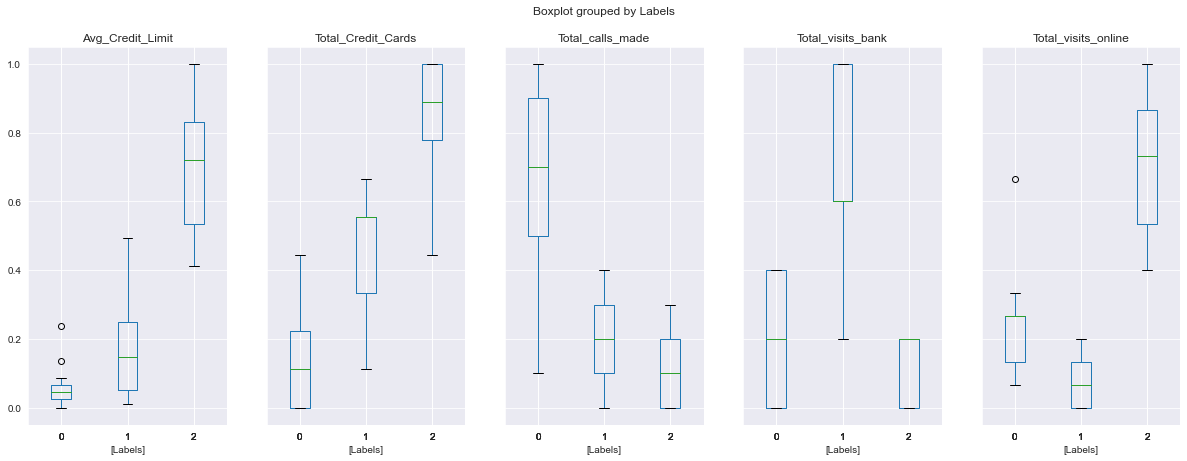

In [22]:
# look at various features based on predicted labels by KMeans 
df_scaled.boxplot(by = 'Labels', layout = (1,5),figsize=(20,7))
plt.show()

In [23]:
# try the same with GMM (Gaussian Mixture Model) clustering method
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components= 3, random_state = 12)
gmm.fit(df_scaled) 
df_scaled['GmmLabels'] = gmm.predict(df_scaled)

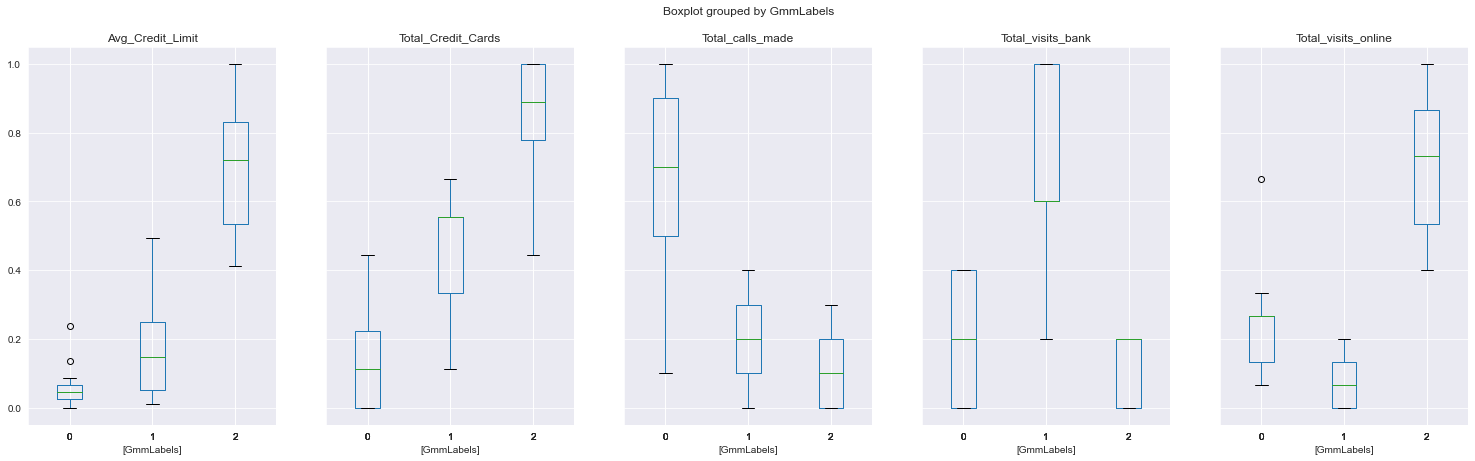

In [24]:
# plotting boxplots with the new GMM based labels

new_features = ["Avg_Credit_Limit",	"Total_Credit_Cards",	"Total_visits_bank",	"Total_visits_online",	"Total_calls_made","GmmLabels"]
df_scaled[new_features].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(25,7))

plt.show()

In [25]:
# Try DBSCAN clustering method
from sklearn.cluster import DBSCAN

dbs = DBSCAN(eps = 0.5, min_samples=3)
df_scaled['DBSLabels'] = dbs.fit_predict(df_scaled)
df_scaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Labels,GmmLabels,DBSLabels
0,0.49,0.11,0.20,0.07,0.00,1,1,0
1,0.24,0.22,0.00,0.67,0.90,0,0,1
2,0.24,0.67,0.20,0.20,0.40,1,1,0
3,0.14,0.44,0.20,0.07,0.40,0,0,1
4,0.49,0.56,0.00,0.80,0.30,2,2,2
...,...,...,...,...,...,...,...,...
639,0.49,1.00,0.20,0.67,0.00,2,2,2
640,0.41,1.00,0.20,0.87,0.20,2,2,2
641,0.72,0.78,0.20,0.60,0.10,2,2,2
642,0.86,1.00,0.20,1.00,0.00,2,2,2


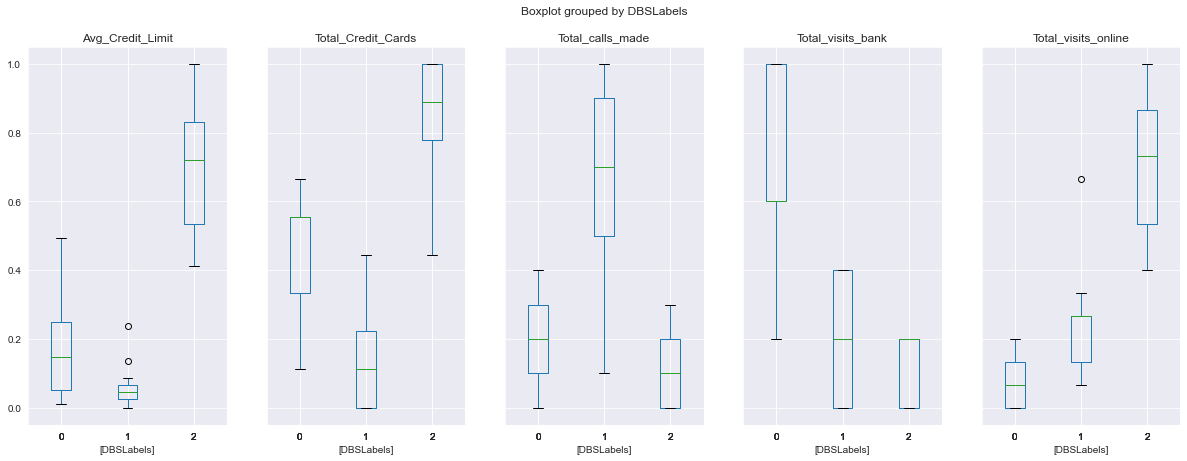

In [26]:
#plotting boxplots with the new DBScan based labels

new_features = ["Avg_Credit_Limit",	"Total_Credit_Cards",	"Total_visits_bank",	"Total_visits_online",	"Total_calls_made","DBSLabels"]

df_scaled[new_features].boxplot(by = 'DBSLabels', layout = (1,5),figsize=(20,7))
plt.show()

In [27]:
print('Cluster sizes in Kmeans:')
print(df_scaled['Labels'].value_counts())
print()

print('Cluster sizes in GMM:')
print(df_scaled['GmmLabels'].value_counts())
print()

print('Cluster sizes in DBSCAN')
print(df_scaled['DBSLabels'].value_counts())

Cluster sizes in Kmeans:
1    373
0    222
2     49
Name: Labels, dtype: int64

Cluster sizes in GMM:
1    373
0    222
2     49
Name: GmmLabels, dtype: int64

Cluster sizes in DBSCAN
0    373
1    222
2     49
Name: DBSLabels, dtype: int64


Based on the 3 clustering techniques, we have the following observations:

Cluster 0: Medium credit limit and total # of credit cards; minimum phone calls and online visits; high bank visits.
Cluster 1: low credit limit and total # of credit cards; medium bank and online visits; high phone calls. 
Cluster 2: high credit limit and total # of credit cards; minimum phone calls and bank visits; high online visits.

credit limit and total # of credit cards are hightly correlated. 